<center>
    <img src="https://gitlab.com/ibm/skills-network/courses/placeholder101/-/raw/master/labs/module%201/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


*   Identify the distribution of data in the dataset.

*   Identify outliers in the dataset.

*   Remove outliers from the dataset.

*   Identify correlation between features in the dataset.


***


## Hands on Lab


Import the pandas module.


In [28]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

Load the dataset into a dataframe.


In [29]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

In [30]:
df["ConvertedComp"].mean()

131596.7316197316

In [36]:
dropped = df["ConvertedComp"].dropna()

In [38]:
df["ConvertedComp"].mean()

131596.7316197316

In [34]:
df["ConvertedComp"].median()

57745.0

In [10]:
#df['ConvertedComp'].dropna(inplace=True)

In [11]:
#df["ConvertedComp"].median()

57745.0

In [13]:
df[('ConvertedComp')].replace(np.nan, 131596.73 , inplace =True)

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


<AxesSubplot:xlabel='ConvertedComp'>

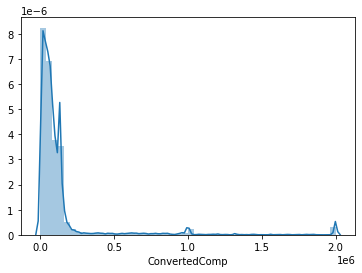

In [14]:
# your code goes here
sns.distplot(df['ConvertedComp'], kde = True)

Plot the histogram for the column `ConvertedComp`.


<AxesSubplot:xlabel='ConvertedComp'>

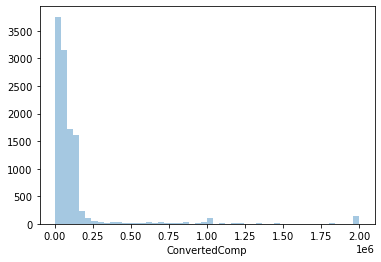

In [15]:
# your code goes here
sns.distplot(df['ConvertedComp'], kde=False)

What is the median of the column `ConvertedComp`?


In [16]:
# your code goes here
df["ConvertedComp"].median()

63016.0

How many responders identified themselves only as a **Man**?


In [17]:
# your code goes here
df['Gender'].value_counts()

Man                                                            10480
Woman                                                            731
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: Gender, dtype: int64

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [18]:
# your code goes here
df.groupby('Gender')['ConvertedComp'].median()

Gender
Man                                                            63016.0
Man;Non-binary, genderqueer, or gender non-conforming          59520.0
Non-binary, genderqueer, or gender non-conforming              68745.0
Woman                                                          61071.0
Woman;Man                                                      25887.0
Woman;Man;Non-binary, genderqueer, or gender non-conforming    30244.0
Woman;Non-binary, genderqueer, or gender non-conforming        65535.5
Name: ConvertedComp, dtype: float64

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [19]:
# your code goes here
#df['Age'].describe(percentiles=[.25]) 
print("Min: ", df['Age'].min())
print("q1: ", df['Age'].quantile(.25))
print("Median: ", df['Age'].median())
print("q3: ", df['Age'].quantile(.75))
print("max: ", df['Age'].max())

Min:  16.0
q1:  25.0
Median:  29.0
q3:  35.0
max:  99.0


Plot a histogram of the column `Age`.


(array([2.094e+03, 5.337e+03, 2.557e+03, 8.420e+02, 2.250e+02, 4.900e+01,
        6.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([16. , 24.3, 32.6, 40.9, 49.2, 57.5, 65.8, 74.1, 82.4, 90.7, 99. ]),
 <BarContainer object of 10 artists>)

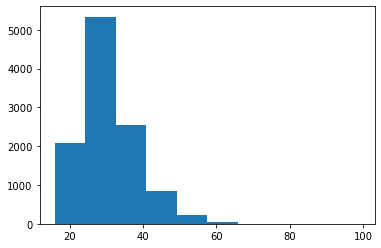

In [20]:
# your code goes here
#sns.distplot(df['Age'], kde=False)
plt.hist(df['Age'])

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


<function matplotlib.pyplot.show(close=None, block=None)>

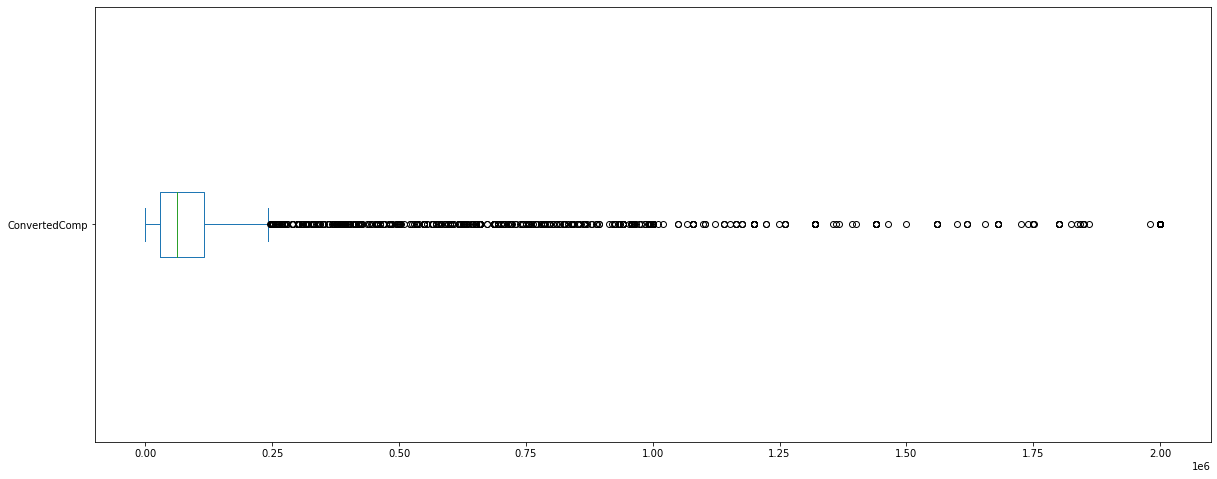

In [21]:
# your code goes here
df['ConvertedComp'].plot.box(figsize=(20,8),vert=False)

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

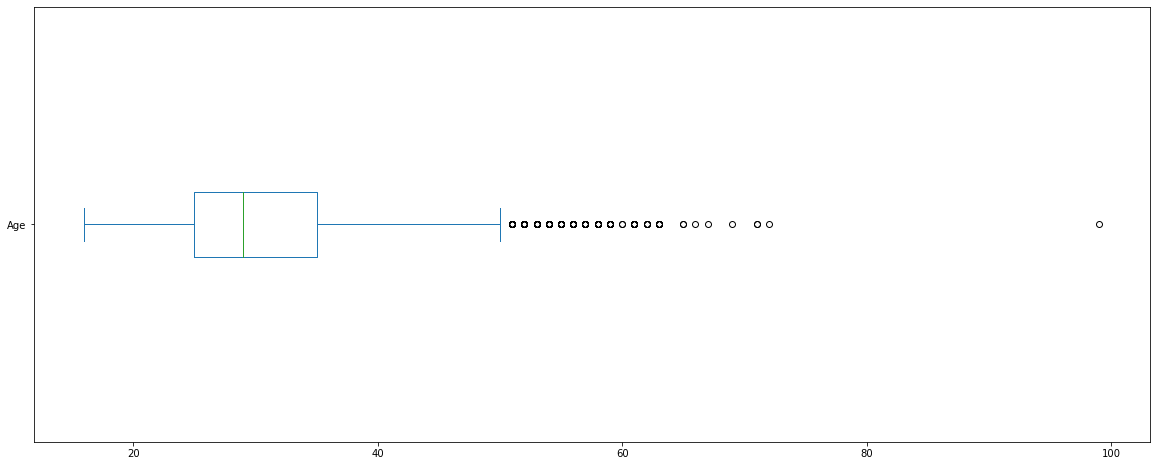

In [27]:
df['Age'].plot.box(figsize=(20,8),vert=False)

plt.show

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [22]:
# your code goes here
df['ConvertedComp'].dropna(inplace=True)
first_Quartile = df['ConvertedComp'].quantile(.25)
third_Quartile = df['ConvertedComp'].quantile(.75)
IQR= third_Quartile - first_Quartile
IQR

86448.0

In [26]:
df['ConvertedComp'].median()

63016.0

Find out the upper and lower bounds.


In [23]:
# your code goes here
lower_limit = first_Quartile - 1.5 * IQR
upper_limit = third_Quartile + 1.5 * IQR
print('lower bounds: ' + str(lower_limit))
print('upper bounds: ' + str(upper_limit))

lower bounds: -100656.0
upper bounds: 245136.0


Identify how many outliers are there in the `ConvertedComp` column.


In [24]:
# your code goes here
((df['ConvertedComp'] < (first_Quartile-1.5*IQR)) | (df['ConvertedComp'] > (third_Quartile+1.5*IQR))).count()

11398

Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [25]:
# your code goes here
df1 = df[~((df['ConvertedComp'] < lower_limit) |(df['ConvertedComp'] > upper_limit))]

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [40]:
# your code goes here
df.corr()['Age']

Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
Name: Age, dtype: float64

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2021-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
